In [1]:
import pandas as pd
import numpy as np


In [19]:
import os
path='C:\\Users\\Varun\\Downloads\\archive\\classification_dataset\\all'
arr = os.listdir(path)
arr[0:10]

['100_1477154436.jpg',
 '100_1477154442.jpg',
 '100_1477154448.jpg',
 '100_1477154454.jpg',
 '100_1477154460.jpg',
 '100_1477154466.jpg',
 '100_1477154472.jpg',
 '100_1477154478.jpg',
 '100_1477154484.jpg',
 '100_1477154490.jpg']

In [20]:
arr1=[]
for i in arr:
    res1=i.replace('_','')
    res2=res1.replace('.jpg','')
    arr1.append(res2)
arr1[1:10]

['1001477154442',
 '1001477154448',
 '1001477154454',
 '1001477154460',
 '1001477154466',
 '1001477154472',
 '1001477154478',
 '1001477154484',
 '1001477154490']

In [4]:
raw_data=[]
for i in arr:
    data=i.split('_')
    raw_data.append(data[0])

In [21]:
raw_data[1:10]

['100', '100', '100', '100', '100', '100', '100', '100', '100']

In [22]:
df=pd.DataFrame()
df['data']=arr1
df['res']=raw_data
df[1:10]
#df.to_csv('data.csv')

,data,res
1,1001477154442,100
2,1001477154448,100
3,1001477154454,100
4,1001477154460,100
5,1001477154466,100
6,1001477154472,100
7,1001477154478,100
8,1001477154484,100
9,1001477154490,100


In [17]:
#training data also saved as a csv file for reference
df.to_csv('data.csv')

In [8]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
X,y=df.iloc[:,0],df.iloc[:,1]
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.25, random_state=0)

In [10]:
xgb1=xgb.XGBClassifier(n_estimators=2000,learning_rate=0.3)
train_x=np.array(train_x)
train_x=train_x.reshape(-1,1)
xgb1.fit(np.vstack(train_x),train_y)

C:\Users\Varun\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
train_pred=xgb1.predict(np.vstack(train_x))
train_pred

array(['50', '25', '5', ..., '25', '5', '5'], dtype=object)

In [13]:
train_acc = np.mean(train_pred==train_y) #1
#train_acc
test_x=np.array(test_x)
test_x=test_x.reshape(-1,1)
test_pred = xgb1.predict(test_x)
test_pred
test_acc = np.mean(test_pred==test_y)
test_acc #1

1.0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

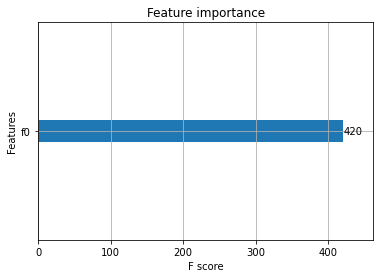

In [14]:
from xgboost import plot_importance
plot_importance(xgb1)

In [ ]:
#I have saved my xgboost model as xgb1 and used it in the defined function.

In [15]:
def photo_name(x):
    
    res1=x.replace('_','')
    res2=res1.replace('.jpg','')
    res2=int(res2)
    res3=np.array(res2)
    res4=res3.reshape(-1,1)
    result=xgb1.predict(res4)
    print("the value of the given coin is:", result)

In [16]:
photo_name("5_1477145520.jpg")

the value of the given coin is: ['5']
